# Multiple linear regression 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm 
import sys
import matplotlib
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [4]:
#读取csv数据 并将第一列作为索引，不新添加编号列
df = pd.read_csv('Desktop/dataset.csv',index_col=0)
df

,y,x1,x2,x3,x4,x5,x6
year,,,,,,,
2005,4740,158,1768,117,94,145,75
2006,5443,158,1857,118,95,143,76
2007,6249,157,1826,119,92,145,87
2008,7128,156,1826,119,90,147,96
2009,7794,158,1867,118,82,150,111
2010,8560,158,1855,119,91,149,114
2011,9853,160,1828,116,93,150,120
2012,10902,158,1821,104,93,150,178
2013,11897,159,1807,103,93,153,194


In [113]:
#描述性统计
df.describe()

,y,x1,x2,x3,x4,x5,x6
count,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000
mean,12114.18750,157.687500,1822.875000,110.062500,92.937500,150.562500,257.43750
std,5393.04838,0.946485,22.899418,7.288976,5.131195,3.811714,185.43713
min,4740.00000,156.000000,1768.000000,103.000000,82.000000,143.000000,75.00000
25%,7627.50000,157.000000,1814.750000,104.000000,91.750000,148.500000,107.25000
50%,11399.50000,158.000000,1820.000000,105.000000,93.000000,151.500000,186.00000
75%,16264.75000,158.000000,1826.500000,118.000000,93.250000,154.000000,416.00000
max,20940.00000,160.000000,1867.000000,119.000000,106.000000,154.000000,577.00000


In [114]:
#计算相关系数矩阵
a = df.corr()
a

,y,x1,x2,x3,x4,x5,x6
y,1.000000,-0.200127,-0.204382,-0.837025,0.294253,0.893099,0.975985
x1,-0.200127,1.000000,0.062671,0.070663,-0.169014,-0.058901,-0.306078
x2,-0.204382,0.062671,1.000000,0.412240,-0.359783,-0.193903,-0.230943
x3,-0.837025,0.070663,0.412240,1.000000,-0.304692,-0.853174,-0.771673
x4,0.294253,-0.169014,-0.359783,-0.304692,1.000000,0.168936,0.350490
x5,0.893099,-0.058901,-0.193903,-0.853174,0.168936,1.000000,0.806419
x6,0.975985,-0.306078,-0.230943,-0.771673,0.350490,0.806419,1.000000


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

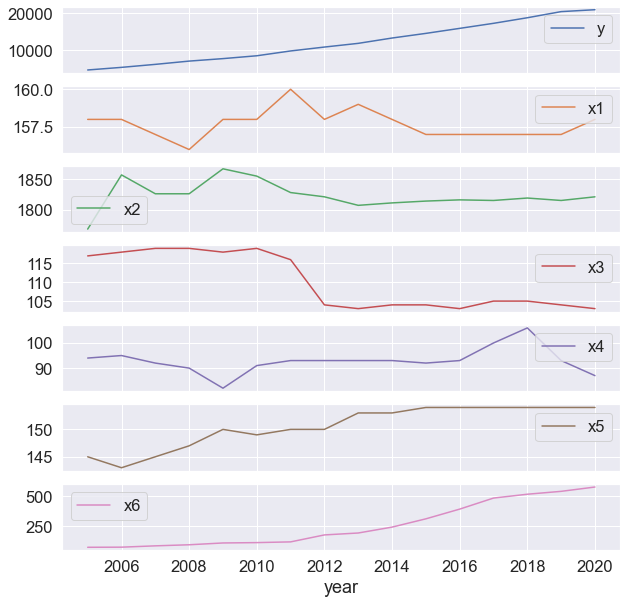

In [115]:
#分别绘制每个变量数据的折线图
df.plot(subplots = True,figsize=(10,10))

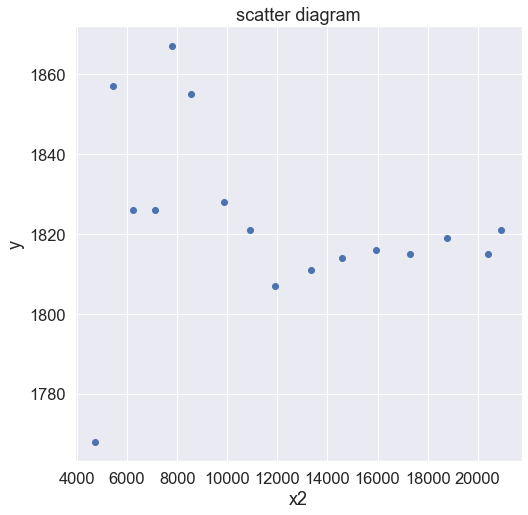

In [131]:
#散点图
plt.scatter(df.y,df.x2)
plt.xlabel('x2')
plt.ylabel('y')
plt.title('scatter diagram')#命名图像
plt.savefig('2.jpg')#保存图像

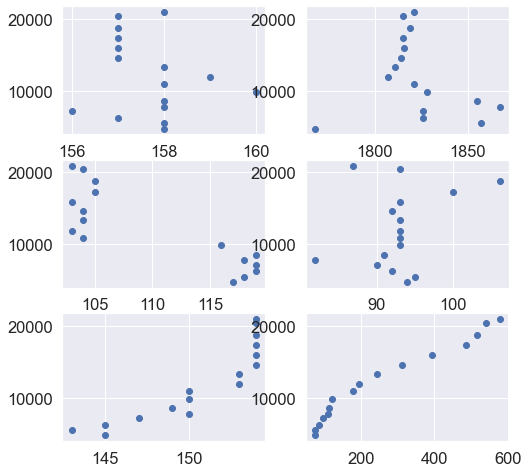

In [132]:
#多张散点图 观察响应变量与每个解释变量的关联趋势
plt.subplot(3, 2, 1) #3，2，1分别对应行数，列数，索引
plt.scatter(df.x1,df.y)

plt.subplot(3, 2, 2)
plt.scatter(df.x2,df.y)

plt.subplot(3, 2, 3)
plt.scatter(df.x3,df.y)

plt.subplot(3, 2, 4)
plt.scatter(df.x4,df.y)

plt.subplot(3, 2, 5)
plt.scatter(df.x5,df.y)

plt.subplot(3, 2, 6)
plt.scatter(df.x6,df.y)


Text(0.5, 1.0, 'heatmap')

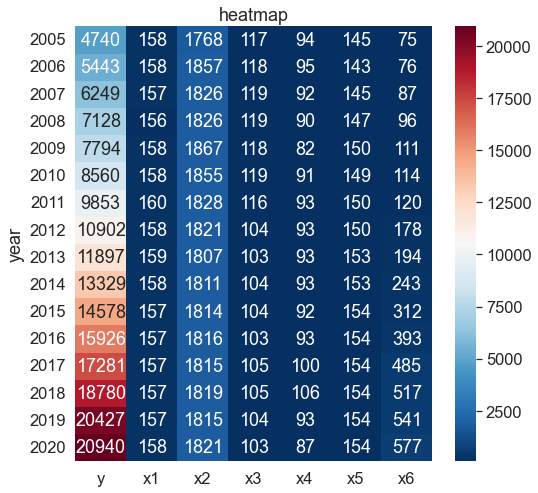

In [193]:
#变量数据热力图
sns.set(font_scale=1.5)
sns.set_context({"figure.figsize":(8,8)})
sns.heatmap(data=df,annot=True,fmt="d",cmap="RdBu_r")
plt.title('heatmap')#命名图像

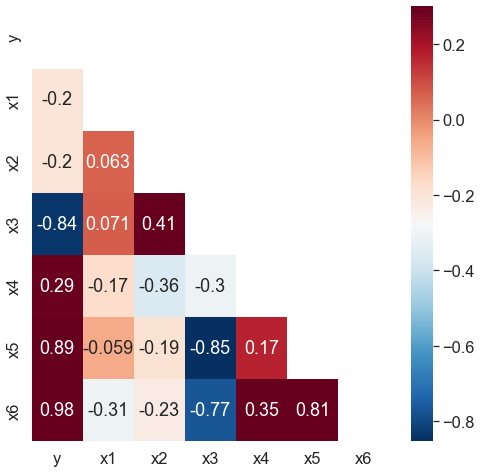

In [136]:
#相关系数矩阵热力图
mask = np.zeros_like(a)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(a, mask=mask, vmax=0.3, annot=True, cmap="RdBu_r")

In [89]:
df_new = np.log(df)
df_new

,y,x1,x2,x3,x4,x5,x6
year,,,,,,,
2005,8.463792,5.062595,7.477604,4.762174,4.543295,4.976734,4.317488
2006,8.602086,5.062595,7.526718,4.770685,4.553877,4.962845,4.330733
2007,8.740177,5.056246,7.509883,4.779123,4.521789,4.976734,4.465908
2008,8.871786,5.049856,7.509883,4.779123,4.499810,4.990433,4.564348
2009,8.961109,5.062595,7.532088,4.770685,4.406719,5.010635,4.709530
2010,9.054855,5.062595,7.525640,4.779123,4.510860,5.003946,4.736198
2011,9.195531,5.075174,7.510978,4.753590,4.532599,5.010635,4.787492
2012,9.296702,5.062595,7.507141,4.644391,4.532599,5.010635,5.181784
2013,9.384042,5.068904,7.499423,4.634729,4.532599,5.030438,5.267858


In [155]:
#时间序列平稳性检验 ADF test
#定义ADF输出格式化函数
def adf_test(timeseries):
    print ('ADF检验结果:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#对时间序列数据做ADF检验
adf_test(df_new.y)
adf_test(df_new.x1)
adf_test(df_new.x2)
adf_test(df_new.x3)
adf_test(df_new.x4)
adf_test(df_new.x5)
adf_test(df_new.x6)

ADF检验结果:
Test Statistic                  0.111355
p-value                         0.966828
Number of Lags Used             5.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64
ADF检验结果:
Test Statistic                -4.591408
p-value                        0.000134
Number of Lags Used            6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64
ADF检验结果:
Test Statistic                -4.013314
p-value                        0.001342
Number of Lags Used            6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64
ADF检验结果:
Test Statistic                -19.416063
p-value                        

In [156]:
#对差分后的序列进行平稳性检验
np.diff(df_new.y)
adf_test(np.diff(df_new.y))

ADF检验结果:
Test Statistic                  1.884507
p-value                         0.998503
Number of Lags Used             4.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [350]:
#least square method 拟合多元回归模型
x = sm.add_constant(df_new.iloc[:,1:]) #生成自变量   
model = sm.OLS(df_new.y, x) #生成模型  
result = model.fit() #模型拟合  
result.summary() #模型描述

/Users/klaus_zhangjt/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     95.33
Date:                Sat, 14 May 2022   Prob (F-statistic):           1.25e-07
Time:                        16:45:13   Log-Likelihood:                 22.906
No. Observations:                  16   AIC:                            -31.81
Df Residuals:                       9   BIC:                            -26.40
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.4422     23.340     -2.847      0.019    -119.241     -13.643
x1             4.5589      3.903      1.168      0.273      -4.271      13.389
x2             3.3106      1.928      1.717      0.120      -1.051       7.672
x3            -0.1621      0.742     -0.219      0.832      -1.840       1.516
x4             0.0947      0.435      0.218      0.832      -0.889       1.078
x5             5.1162      2.220      2.305      0.047       0.095      10.138
x6             0.4717      0.087      5.448      0.000       0.276       0.668
==============================================================================
Omnibus:                        0.484   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.785   Jarque-Bera (JB):                0.564
Skew:                          -0.186   Prob(JB):                        0.754
Kurtosis:                       2.158   Cond. No.                     1.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [461]:
result.resid
adf_test(result.resid)

ADF检验结果:
Test Statistic                 -1.132073
p-value                         0.702114
Number of Lags Used             5.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [388]:
original_mse = np.sum((result.resid)**2)/16
print('初始回归模型的MSE：',original_mse)

初始回归模型的MSE： 0.0033422869809875203


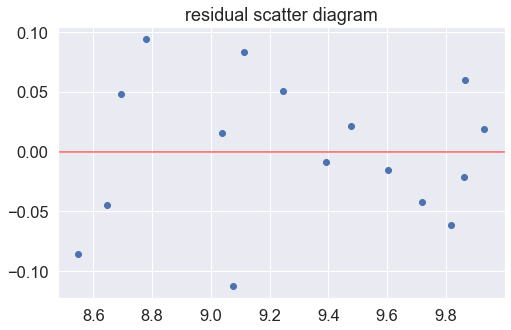

In [200]:
#残差分析
y_predict = result.predict(x)#响应变量的预测值
plt.figure(figsize=(8,5))#设置图像大小
plt.scatter( y_predict, result.resid)#以y的预测值为横坐标的残差图
plt.title('residual scatter diagram')#命名图像
plt.axhline(y=0,alpha=0.6,color='red')#画出参考线y=0
plt.savefig('res.jpg')#保存图像

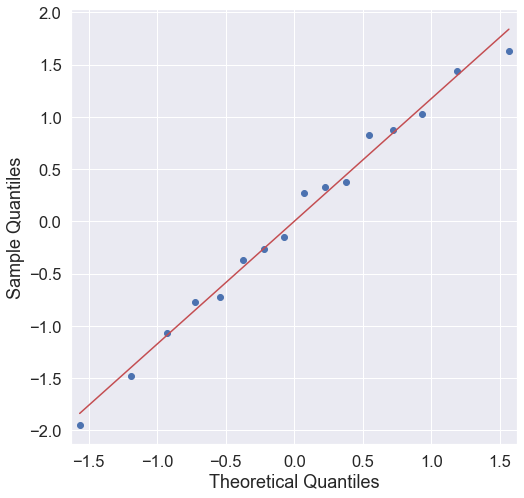

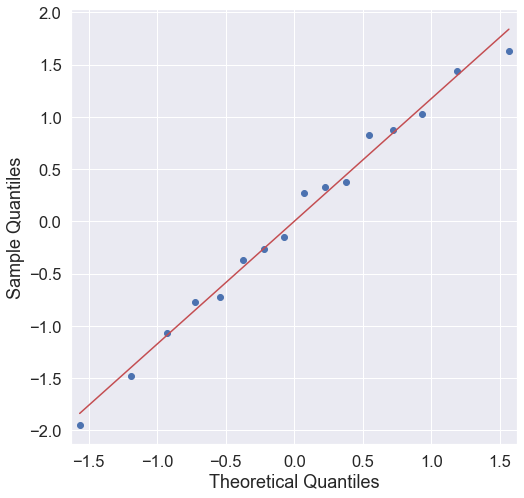

In [221]:
#绘制残差QQ图

import statsmodels.api as sm

z_res = (result.resid - np.mean(result.resid))/np.std(result.resid)#化标准化残差
sm.qqplot(z_res,line='r')

/Users/klaus_zhangjt/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

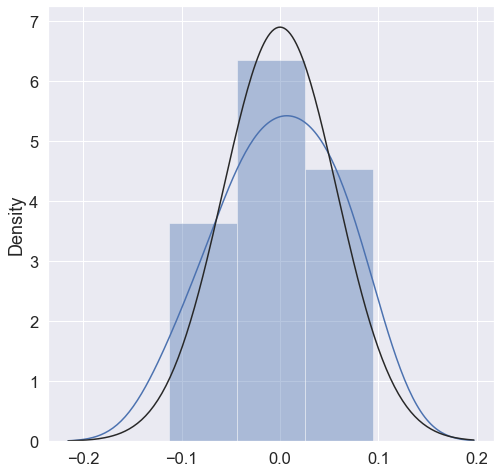

In [223]:
#残差直方图

import seaborn as sns

sns.distplot(result.resid,kde=True,fit=stats.norm)

In [242]:
#残差的正态性检验 Shapiro test
#Null hypothesis of shapiro test：被检验的样本数据符合正态分布

from scipy import stats
stats.shapiro(result.resid)

In [291]:
#判断解释变量之间是否存在多重共线性
#条件数方法
#一般当条件数超过20的时候，我们认为变量间存在多重共线性
x = sm.add_constant(df_new.iloc[:,1:])
xx=np.dot(x.T,x)
eig,eigv=np.linalg.eigh(xx)
cond1=np.max(eig)/np.min(eig)
count = np.round(cond1**0.5,0)
print('条件数为:',count)

条件数为: 16310.0


In [245]:
#根据条件数远大于20，我们认为变量间存在多重共线性，继而寻找具体哪个变量引起多重共线性
#方差膨胀因子 VIF法
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = sm.add_constant(df_new.iloc[:,1:])

# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
vif = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]

#输出每个变量vif值的table
def checkVIF(df):
    name = df.columns
    x = np.matrix(df)
    VIF_list = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
    VIF = pd.DataFrame({'feature':name,"VIF":VIF_list})
    max_VIF = max(VIF_list)
    print(max_VIF)
    return VIF

checkVIF(x)

1466916.4188719434


,feature,VIF
0,const,1.466916e+06
1,x1,1.380597e+00
2,x2,1.483027e+00
3,x3,6.010427e+00
4,x4,1.429602e+00
5,x5,8.115184e+00
6,x6,1.079662e+01


In [282]:
#对两个变量进行协整检验

from statsmodels.tsa.stattools import coint
 
print(coint(df_new.y, df_new.x1))


(-0.0, 0.9859002580259643, array([-4.77557556, -3.77379444, -3.33928556]))


## Ridge regression

在回归分析中，常用OLS方法对参数进行估计，其思想在于最小化如下的残差平方和，即变为一个无约束优化问题
$$
f(w)=\sum_{i=1}^{m}\left(y_{i}-x_{i}^{T} w\right)^{2}
$$
$f(w)$可以通过矩阵表示:
$$
f(w)=(y-X w)^{T}(y-X w)
$$
可以得到的回归系数的估计值为:
$$
\hat{w}=\left(X^{T} X\right)^{-1} X^{T} y
$$
该问题的解存在且唯一的条件为$X^{T} X$为列满秩矩阵: $\operatorname{rank}(X)=\operatorname{dim}(X)$.

但是当数据特征中存在共线性, 即自变量之间相关性比较大的时候, 会使得标准最小二乘求解不稳定， $X^{T} X$ 的行列式接近零, 计算 $X^{T} X$ 的时候误差会很大。这时考虑在cost function上添加一个惩罚项 $\lambda \sum_{i=1}^{n} w_{i}^{2}$, 称为 $L 2$ 正则化。
此时cost function可写为:
$$
f(w)=\sum_{i=1}^{m}\left(y_{i}-x_{i}^{T} w\right)^{2}+\lambda \sum_{i=1}^{n} w_{i}^{2}
$$
通过对加入此惩罚项后的损失函数进行优化, 我们对回归系数$w_{i}^{2}$进行了限制, 可以等价表示为如下形式:
$$
f(w)=\sum_{i=1}^{m}\left(y_{i}-x_{i}^{T} w\right)^{2}
$$
$$
\text { s.t. } \sum_{i=1}^{n} w_{j}^{2} \leq t
$$
其中 $t$ 为待设置的阈值。
可以得到岭回归方法的系数估计值为:
$$
\hat{w}=\left(X^{T} X+\lambda I\right)^{-1} X^{T} y
$$


In [295]:
#岭回归
from sklearn.linear_model import Ridge


x = sm.add_constant(df_new.iloc[:,1:])

clf = Ridge(alpha=1.0)
clf.fit(x, df_new.y)

print(clf.score(x, df_new.y))  # 输出R2
print(clf.coef_)  # 回归系数
print(clf.get_params())  # 输出参数设置


0.945453650214166
[ 0.          0.00328583  0.00524559 -0.04759911 -0.00965926  0.02799287
  0.5520226 ]
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


/Users/klaus_zhangjt/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.09608895453207679, 1e-05)

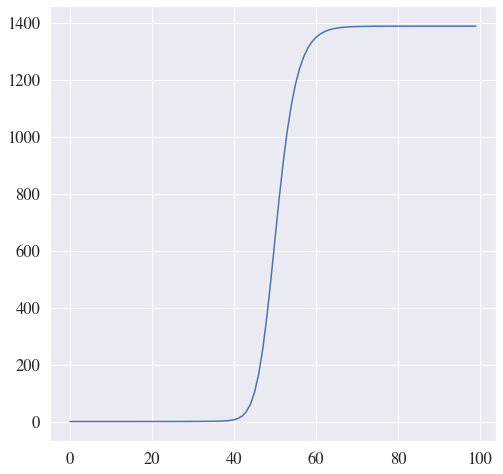

In [375]:
mse = [] #均方误差

##超参数的范围，100个，从10^-5到10^10
lam=10**np.linspace(-5,10,100)

for l in lam:
    ##L1_wt:0为岭回归；1为Lasso；0-1之间为ElasticNet算法
    ridge_result = model.fit_regularized(L1_wt=0,alpha=l,refit=True,profile_scale=False)
    pred=ridge_result.predict() ##根据原始数据进行预测
    mse.append(np.sum((df_new.y-pred)**2))##计算均方误差
    
sns.lineplot(np.arange(0,len(mse)),mse)

##最小均方误差及其对应的lambda值
lammin=lam[np.argmin(mse)]
np.min(mse),lammin

Text(0.5, 1.0, 'Diagram of ridge')

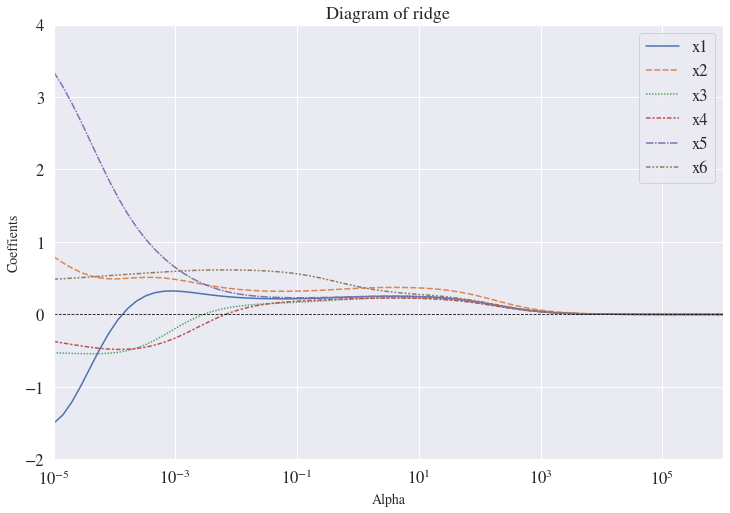

In [373]:
##岭回归随着lambda趋于无穷，压缩惩罚项影响力增加，岭回归系数估计值越接近0.

##设置matplotlib参数以正确显示中文和'-'符号
plt.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)

##设置lambda范围
alpha=10**np.linspace(-5,10,100)
intercept_dict = {}

for a in alpha:
    estimation = model.fit_regularized(L1_wt=0,alpha=a,refit=True,profile_scale=True)
    intercept_dict[a]=estimation.params ##保存每次迭代的回归系数估计值
    
##得到lambda参数与对应的系数估计值，去掉截距项
params_rr = pd.DataFrame(intercept_dict).T
params_rr=params_rr[[1,2,3,4,5,6]]

##行索引是alpha值，列索引是自变量名
params_rr.columns=['x1','x2','x3','x4','x5','x6']
plt.figure(figsize = (12,8))

##Seaborn使用行索引为X轴，每一列的数据为Y轴，绘制曲线
#列名作为示意图的标记。
sns.lineplot(data = params_rr,dashes=True)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.8,color = 'black')
plt.xticks(alpha)

##对X轴进行对数转换伸缩。
plt.xscale('log')
plt.ylim(-2,4)
plt.xlim(10**(-5),10**6)
plt.ylabel('Coeffients',size=14)
plt.xlabel('Alpha',size=14)
plt.title('Diagram of ridge')

In [336]:
#不同lambda值下的回归系数的估计值
params_rr

,x1,x2,x3,x4,x5,x6
1.000000e-05,-1.502234e+00,7.985478e-01,-5.268093e-01,-3.714669e-01,3.350920e+00,4.867067e-01
1.417474e-05,-1.387492e+00,7.131056e-01,-5.328619e-01,-3.932975e-01,3.143454e+00,4.929984e-01
2.009233e-05,-1.204643e+00,6.390963e-01,-5.372086e-01,-4.145605e-01,2.909757e+00,5.003910e-01
2.848036e-05,-9.759592e-01,5.781053e-01,-5.402284e-01,-4.347901e-01,2.654219e+00,5.086712e-01
4.037017e-05,-7.264700e-01,5.325497e-01,-5.417297e-01,-4.530100e-01,2.385486e+00,5.175247e-01
...,...,...,...,...,...,...
2.477076e+09,1.899983e-08,2.818877e-08,1.763211e-08,1.701236e-08,1.882970e-08,1.999876e-08
3.511192e+09,1.340400e-08,1.988662e-08,1.243910e-08,1.200188e-08,1.328398e-08,1.410873e-08
4.977024e+09,9.456259e-09,1.402962e-08,8.775541e-09,8.467093e-09,9.371584e-09,9.953428e-09
7.054802e+09,6.671204e-09,9.897618e-09,6.190970e-09,5.973367e-09,6.611467e-09,7.021947e-09


In [377]:
from sklearn import model_selection
from sklearn.linear_model import Ridge,RidgeCV,LassoLarsIC
from sklearn.metrics import mean_squared_error

x_new = x.iloc[:, 1:]

#基于最佳lambda值建模
ridge=Ridge(alpha=lammin)
ridge.fit(x_new,df_new.y)
#回归系数
print(pd.Series(index=['Intercept']+x_new.columns.tolist(),
                data=[ridge.intercept_]+ridge.coef_.tolist()))

#模型评估
ridge_pred=ridge.predict(x_new)

#均方误差
MSE=mean_squared_error(df_new.y,ridge_pred)
print('MSE:',MSE,'\naplha:',lammin)

Intercept   -65.785208
x1            4.473904
x2            3.297461
x3           -0.166753
x4            0.091322
x5            5.097868
x6            0.471721
dtype: float64
MSE: 0.0033426097677561554 
aplha: 1e-05


In [387]:
res_rr = df_new.y - ridge_pred
res_rr

year
2005   -0.085853
2006   -0.044499
2007    0.047276
2008    0.093209
2009   -0.112063
2010    0.016362
2011    0.084571
2012    0.050463
2013   -0.008140
2014    0.021829
2015   -0.015778
2016   -0.042447
2017   -0.061618
2018   -0.021154
2019    0.059118
2020    0.018723
Name: y, dtype: float64

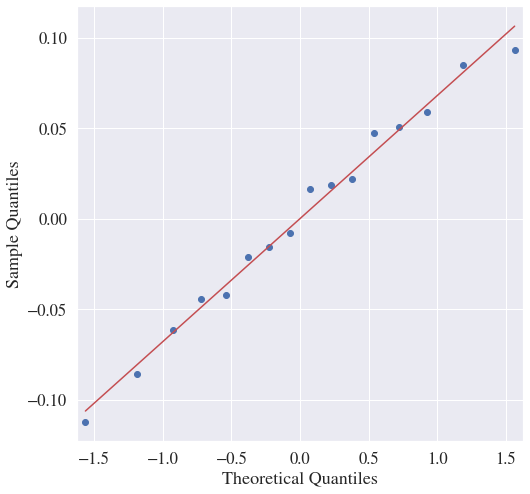

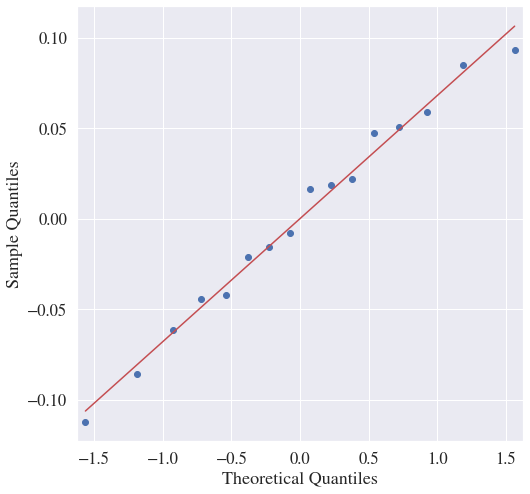

In [384]:
sm.qqplot(res_rr,line='r')

In [385]:
stats.shapiro(res_rr)

ShapiroResult(statistic=0.9767165780067444, pvalue=0.9321733117103577)

In [390]:
##格兰杰因果检验
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(df_new[['y', 'x1']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2519  , p=0.2851  , df_denom=12, df_num=1
ssr based chi2 test:   chi2=1.5649  , p=0.2109  , df=1
likelihood ratio test: chi2=1.4885  , p=0.2224  , df=1
parameter F test:         F=1.2519  , p=0.2851  , df_denom=12, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9683  , p=0.4160  , df_denom=9, df_num=2
ssr based chi2 test:   chi2=3.0126  , p=0.2217  , df=2
likelihood ratio test: chi2=2.7286  , p=0.2556  , df=2
parameter F test:         F=0.9683  , p=0.4160  , df_denom=9, df_num=2


{1: ({'ssr_ftest': (1.2519198284437372, 0.28508370358488, 12.0, 1),
   'ssr_chi2test': (1.5648997855546714, 0.2109492371429826, 1),
   'lrtest': (1.4885367729154382, 0.22244362662648046, 1),
   'params_ftest': (1.25191982844427, 0.28508370358478236, 12.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.9683384527660357, 0.41601316306435776, 9.0, 2),
   'ssr_chi2test': (3.0126085197165553, 0.22172791434180913, 2),
   'lrtest': (2.728563840301746, 0.2555641255632, 2),
   'params_ftest': (0.9683384527657852, 0.41601316306444364, 9.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [391]:
grangercausalitytests(df_new[['y', 'x2']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0002  , p=0.9882  , df_denom=12, df_num=1
ssr based chi2 test:   chi2=0.0003  , p=0.9866  , df=1
likelihood ratio test: chi2=0.0003  , p=0.9866  , df=1
parameter F test:         F=0.0002  , p=0.9882  , df_denom=12, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1943  , p=0.8268  , df_denom=9, df_num=2
ssr based chi2 test:   chi2=0.6044  , p=0.7392  , df=2
likelihood ratio test: chi2=0.5917  , p=0.7439  , df=2
parameter F test:         F=0.1943  , p=0.8268  , df_denom=9, df_num=2


{1: ({'ssr_ftest': (0.00022663515572258927, 0.9882361761025337, 12.0, 1),
   'ssr_chi2test': (0.00028329394465323655, 0.9865711691891438, 1),
   'lrtest': (0.00028329126951121, 0.9865712325874673, 1),
   'params_ftest': (0.0002266351558729617, 0.9882361760986612, 12.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.19426934104785842, 0.8267996662127229, 9.0, 2),
   'ssr_chi2test': (0.6043935054822261, 0.739192612408212, 2),
   'lrtest': (0.5917111040848795, 0.7438948743550311, 2),
   'params_ftest': (0.19426934104774596, 0.8267996662128122, 9.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [392]:
grangercausalitytests(df_new[['y', 'x3']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2222  , p=0.6458  , df_denom=12, df_num=1
ssr based chi2 test:   chi2=0.2777  , p=0.5982  , df=1
likelihood ratio test: chi2=0.2752  , p=0.5999  , df=1
parameter F test:         F=0.2222  , p=0.6458  , df_denom=12, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7651  , p=0.4933  , df_denom=9, df_num=2
ssr based chi2 test:   chi2=2.3802  , p=0.3042  , df=2
likelihood ratio test: chi2=2.1982  , p=0.3332  , df=2
parameter F test:         F=0.7651  , p=0.4933  , df_denom=9, df_num=2


{1: ({'ssr_ftest': (0.22219788948352884, 0.645824752781859, 12.0, 1),
   'ssr_chi2test': (0.277747361854411, 0.5981814908894307, 1),
   'lrtest': (0.27520721708664553, 0.59985992349741, 1),
   'params_ftest': (0.22219788948329586, 0.6458247527820298, 12.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.7650513029634275, 0.4933380115247794, 9.0, 2),
   'ssr_chi2test': (2.3801596092195525, 0.30419698677617235, 2),
   'lrtest': (2.198188900807054, 0.33317265149529085, 2),
   'params_ftest': (0.7650513029631056, 0.4933380115249149, 9.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [393]:
grangercausalitytests(df_new[['y', 'x4']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7938  , p=0.1205  , df_denom=12, df_num=1
ssr based chi2 test:   chi2=3.4923  , p=0.0617  , df=1
likelihood ratio test: chi2=3.1395  , p=0.0764  , df=1
parameter F test:         F=2.7938  , p=0.1205  , df_denom=12, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=10.2196 , p=0.0048  , df_denom=9, df_num=2
ssr based chi2 test:   chi2=31.7943 , p=0.0000  , df=2
likelihood ratio test: chi2=16.5914 , p=0.0002  , df=2
parameter F test:         F=10.2196 , p=0.0048  , df_denom=9, df_num=2


{1: ({'ssr_ftest': (2.7938161888676643, 0.12048057191632608, 12.0, 1),
   'ssr_chi2test': (3.4922702360845803, 0.06165597766294974, 1),
   'lrtest': (3.1395392788851098, 0.07641539056350266, 1),
   'params_ftest': (2.7938161888672184, 0.12048057191635295, 12.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (10.219581747210393, 0.004829772760509618, 9.0, 2),
   'ssr_chi2test': (31.794254324654556, 1.2472841263145024e-07, 2),
   'lrtest': (16.591418230918094, 0.00024958547520271667, 2),
   'params_ftest': (10.219581747209984, 0.004829772760510223, 9.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [394]:
grangercausalitytests(df_new[['y', 'x5']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3456  , p=0.5675  , df_denom=12, df_num=1
ssr based chi2 test:   chi2=0.4319  , p=0.5110  , df=1
likelihood ratio test: chi2=0.4258  , p=0.5140  , df=1
parameter F test:         F=0.3456  , p=0.5675  , df_denom=12, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1663  , p=0.3545  , df_denom=9, df_num=2
ssr based chi2 test:   chi2=3.6286  , p=0.1630  , df=2
likelihood ratio test: chi2=3.2265  , p=0.1992  , df=2
parameter F test:         F=1.1663  , p=0.3545  , df_denom=9, df_num=2


{1: ({'ssr_ftest': (0.3455565302664896, 0.5675372455571188, 12.0, 1),
   'ssr_chi2test': (0.431945662833112, 0.5110357823046003, 1),
   'lrtest': (0.4258433013610414, 0.5140356576855065, 1),
   'params_ftest': (0.34555653026649874, 0.5675372455571126, 12.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.1663212899143482, 0.3544875031697319, 9.0, 2),
   'ssr_chi2test': (3.6285551241779723, 0.16295559117270164, 2),
   'lrtest': (3.2264779108202504, 0.19924123436873065, 2),
   'params_ftest': (1.1663212899144313, 0.35448750316970845, 9.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [395]:
grangercausalitytests(df_new[['y', 'x6']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0154  , p=0.9032  , df_denom=12, df_num=1
ssr based chi2 test:   chi2=0.0193  , p=0.8896  , df=1
likelihood ratio test: chi2=0.0193  , p=0.8896  , df=1
parameter F test:         F=0.0154  , p=0.9032  , df_denom=12, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0515  , p=0.9500  , df_denom=9, df_num=2
ssr based chi2 test:   chi2=0.1604  , p=0.9229  , df=2
likelihood ratio test: chi2=0.1595  , p=0.9234  , df=2
parameter F test:         F=0.0515  , p=0.9500  , df_denom=9, df_num=2


{1: ({'ssr_ftest': (0.015420617704047648, 0.9032287958105979, 12.0, 1),
   'ssr_chi2test': (0.019275772130059557, 0.8895787858366159, 1),
   'lrtest': (0.019263397550531636, 0.8896140083227169, 1),
   'params_ftest': (0.015420617703960809, 0.9032287958108647, 12.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.051547630266910414, 0.9500367357472377, 9.0, 2),
   'ssr_chi2test': (0.1603704052748324, 0.9229453986351188, 2),
   'lrtest': (0.15945883621910184, 0.923366158748572, 2),
   'params_ftest': (0.05154763026685495, 0.9500367357472895, 9.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [459]:
nums = [-1,0,1,2,-1,-4]
map = {}

ans = list()


for index, value in enumerate(nums):
            map[value] = index
        
for i in range(len(nums)):
    if nums[i] < 0:
        for j in range(len(nums)):
            another = abs(nums[i]) - nums[j]
            if another in map and map[another] != i:
                ans.append([nums[i], nums[j], another]) 

ans

[[-1, -1, 2],
 [-1, 0, 1],
 [-1, 1, 0],
 [-1, 2, -1],
 [-1, -1, 2],
 [-1, -1, 2],
 [-1, 0, 1],
 [-1, 1, 0],
 [-1, -1, 2],
 [-4, 2, 2]]